In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cat = pd.read_csv('cosine_similarity_category.csv', index_col='Unnamed: 0')

cat['category_score'] = cat['category_score'].apply(lambda x: [float(cs) for cs in x[1:-1].split(',')])

cat.head(4)

,Name,Description_Title,similar_categories,category_score
0,abolfazl safikhani,abolfazl safikhani currently assistant profe...,"['stochastic modeling', 'modeling nanoparticle...","[0.3258514946996161, 0.3232521973429334, 0.323..."
1,aditya johri,aditya johri study use information communica...,"['results clinical studies', 'bioengineering',...","[0.2769955015366262, 0.27643225241166486, 0.27..."
2,ahmed bin zaman,ever tell story let say friend call zoo bad ...,"['structural engineering', 'structural stress'...","[0.3581828950543877, 0.33878704316095354, 0.32..."
3,alexander brodsky,alex brodsky join george mason university 19...,"['model based systems engineering', 'network m...","[0.2560685111848679, 0.22484437003969773, 0.22..."


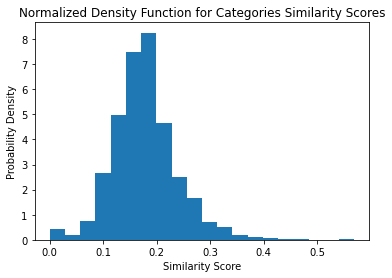

In [19]:
scores = []
for l in cat.category_score.values:
    scores += l
    
plt.hist(scores, bins=20, density=True)
plt.xlabel('Similarity Score')
plt.ylabel('Probability Density')
plt.title('Normalized Density Function for Categories Similarity Scores')
plt.show()

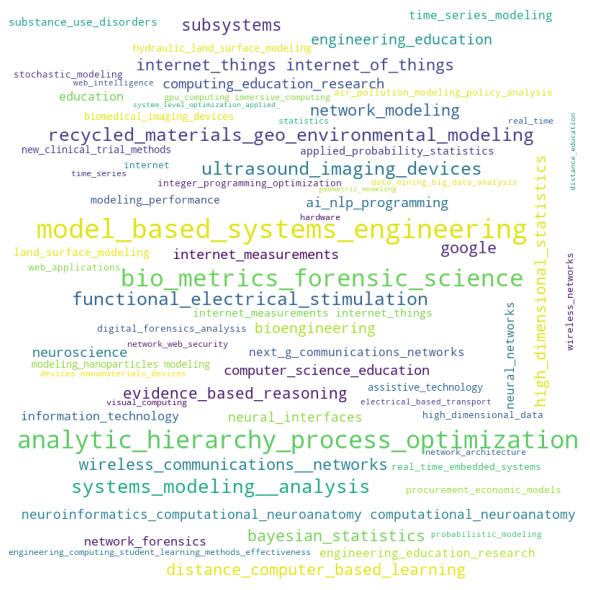

In [6]:
cats = ''
for l in cat.similar_categories.values:
    cats += l[1:-1].replace(', ', ',').replace(' ', '_').replace("','", ' '). replace("'",'')
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(cats)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

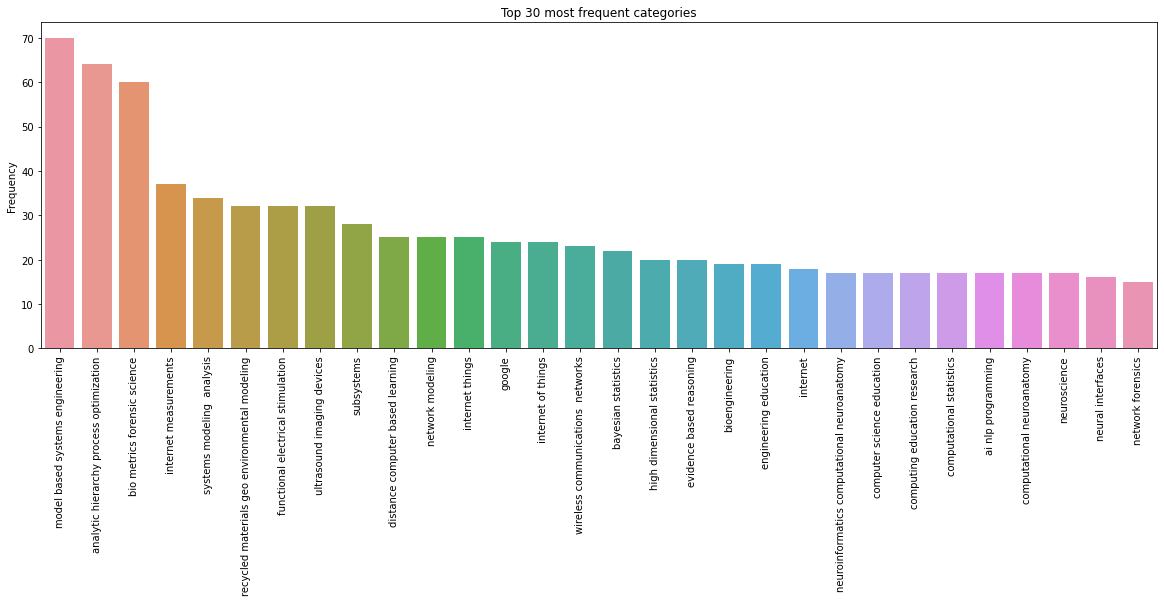

In [23]:
df = pd.DataFrame()

df['cats'] = cats.split()

counts = df.cats.value_counts()

plt.figure(figsize = (20,6))
sns.barplot(x=counts[:30].index.str.replace('_', ' '), y=counts[:30].values)
plt.xticks(rotation = 90)
plt.title('Top 30 most frequent categories')
plt.ylabel('Frequency')
plt.show()

In [8]:
area = pd.read_csv('cosine_similarity_area.csv', index_col='Unnamed: 0')

area['area_score'] = area['area_score'].apply(lambda x: [float(cs) for cs in x[1:-1].split(',')])

area.head(4)

,Name,Description_Title,similar_area,area_score
0,abolfazl safikhani,abolfazl safikhani currently assistant profe...,"['stochastic modeling', 'statistical modeling'...","[0.3258514946996161, 0.3192429620458017, 0.129..."
1,aditya johri,aditya johri study use information communica...,"['design results clinical studies', 'visual co...","[0.27032910538576066, 0.21385780181719366, 0.1..."
2,ahmed bin zaman,ever tell story let say friend call zoo bad ...,"['structural engineering', 'autonomous systems...","[0.3581828950543877, 0.09065956796066224, 0.09..."
3,alexander brodsky,alex brodsky join george mason university 19...,"['stochastic modeling', 'statistical modeling'...","[0.18918082523955362, 0.18388119261399738, 0.1..."


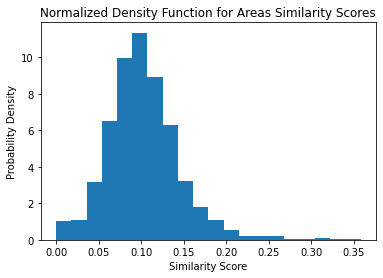

In [20]:
scores = []
for l in area.area_score.values:
    scores += l
    
plt.hist(scores, bins=20, density=True)
plt.xlabel('Similarity Score')
plt.ylabel('Probability Density')
plt.title('Normalized Density Function for Areas Similarity Scores')
plt.show()

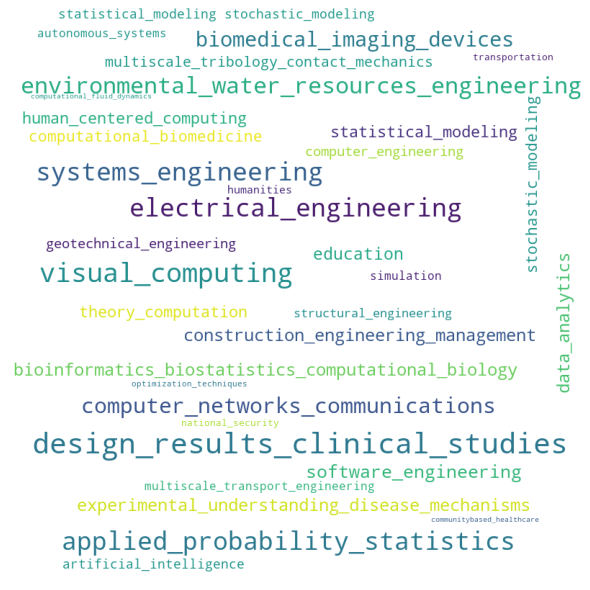

In [17]:
areas = ''
for l in area.similar_area.values:
    areas += l[1:-1].replace(', ', ',').replace(' ', '_').replace("','", ' '). replace("'",'')
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(areas)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

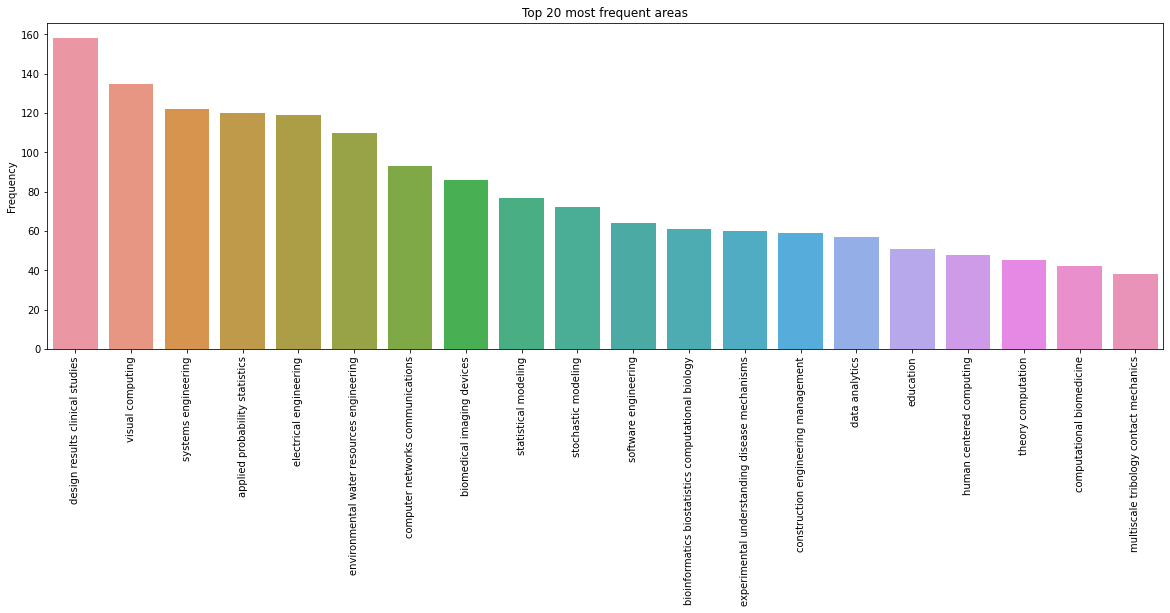

In [25]:
df = pd.DataFrame()

df['areas'] = areas.split()

counts = df.areas.value_counts()

plt.figure(figsize = (20,6))
sns.barplot(x=counts[:20].index.str.replace('_', ' '), y=counts[:20].values)
plt.xticks(rotation = 90)
plt.title('Top 20 most frequent areas')
plt.ylabel('Frequency')
plt.show()